<h1> Main.ipynb </h1>
<h2> 1. Import libraries and modules </h2>

In [1]:
import numpy as np
import pandas as pd

from src.Data_Retriever import DataRetriever as DatRet

from src.Optimization.Markowitz_PT import MarkowitzPT as MPT

from src.Optimization.Environment import PortfolioEnvironment as PorEnv
from src.Optimization.RLModelCompilation import RL_Model as RLM
# from src.Optimization.NeuralNet import CustomCNNExtractor 

from src.Result.Menchero_OGA import MencheroOGA as MOGA
from src.Result.IndPortResults import GenerateResult as GR
from src.Result.OverviewResults import ResultConveyor as RC

import time

<h2> 2. Define operating variables </h2>

In [2]:
trading_n = 400
history_usage = 504
n_sectors = 6
n_stocks_per_sector = 4

# For RL algorithm
history_usage_RL = 30
rolling_reward_window = 15

<h2> 3. Define stock dataframe </h2>

In [3]:
ticker_df =  pd.DataFrame()
ticker_df["Petroleum"] = ["EQNR.OL", "AKRBP.OL", "SUBC.OL", "BWO.OL",]
ticker_df["Seafood (food)"] = ["ORK.OL", "MOWI.OL", "SALM.OL", "LSG.OL"]
ticker_df["Materials"] = ["NHY.OL", "YAR.OL", "RECSI.OL", "BRG.OL"]  #del this
ticker_df["Technologies"] = ["TEL.OL", "NOD.OL", "ATEA.OL", "BOUV.OL"]
ticker_df["Financial"] = ["STB.OL", "DNB.OL", "GJF.OL", "AKER.OL"]
ticker_df["Shipping"] = ["WAWI.OL", "SNI.OL", "BELCO.OL", "ODF.OL"]
ticker_df

,Petroleum,Seafood (food),Materials,Technologies,Financial,Shipping
0,EQNR.OL,ORK.OL,NHY.OL,TEL.OL,STB.OL,WAWI.OL
1,AKRBP.OL,MOWI.OL,YAR.OL,NOD.OL,DNB.OL,SNI.OL
2,SUBC.OL,SALM.OL,RECSI.OL,ATEA.OL,GJF.OL,BELCO.OL
3,BWO.OL,LSG.OL,BRG.OL,BOUV.OL,AKER.OL,ODF.OL


<h2> 4. Define ESG array </h2>

In [4]:
esg_scores = np.array([36.6, 35.3, 17.9, 18, 
                18, 21.2, 18.7, 29.2, 
                15.7, 25.6, 25.6, 18.4, # Del this
                19.8, 13.8, 18.1, 19, 
                17.2, 14, 17.2, 19.5, 
                19.7, 21.2, 26.8, 19.3])

<h2> 5.-7. (Non-necessary for reproducability) </h2>
<h3>Data retrieval</h3>
<h3>Benchmark optimization (MPT)</h3>
<h3>RL optimization x4</h3>
<br>
All of the data has been generated an stored in csvs. Therefore, I can comment out the code lines below.

In [5]:
# Retrieve data from yf API: y-m-d
# data = DatRet(ticker_df, "2013-01-01", "2024-12-31", history_usage_RL=history_usage_RL)
# # In function below, set log=True to check for data availability
# data.retrieve_data()

In [6]:
# Generate benchmark weights thorugh MPT using Sharpe ratio
# # benchmark = MPT(history_usage, trading_n)
# IMPORTANT: In order to see  the effect of the weights, algo exclude last observation from optimization
# # benchmark.frequency_optimizing()

In [7]:
# objectives = ["Return", "Sharpe", "Sortino", "Sterling", "Return", "Sharpe", "Sortino", "Sterling"]
# esg_compliancy = [True, True, True, True, False, False, False, False]
# # objectives = ["Sharpe"]
# # esg_compliancy = [True]

# for i in range(len(objectives)):
#     reinforcement = RLM(esg_scores, 
#                         objective=objectives[i],
#                         history_usage=history_usage_RL,
#                         rolling_reward_window=rolling_reward_window,
#                         total_timesteps=200,
#                         esg_compliancy=esg_compliancy[i],
#                         )
#     reinforcement.train_model()
#     reinforcement.test_model()

<h2> 8. Attribution analysis </h2>

In [8]:
# paths = ["Return_esg_True", "Sharpe_esg_True",
#          "Sortino_esg_True","Sterling_esg_True",
#          "Return_esg_False", "Sharpe_esg_False",
#          "Sortino_esg_False","Sterling_esg_False",]

# analysis_list = []
# for i in range(len(paths)):
#     att_anal = GR(paths[i],
#             n_sectors, n_stocks_per_sector,
#             trading_n,
#             esg_scores, 
#             ticker_df.columns)
#     att_anal.friple_frequency_analysis()
#     analysis_list.append(att_anal)

<h2> 9. Overview  Result Analysis </h2>

In [9]:
# theta = RC(analysis_list, trading_n)
# theta.convey_results()

<h1> 10. Ad-hoc </h1>

In [10]:
ret = pd.read_csv("Data/Input/StockReturns.csv")
weights = pd.read_csv("Data/RL_weights_Sharpe_esg_false.csv")

train_set = ret.iloc[:int(0.85*len(ret))]
test_set = ret.iloc[int(0.85*len(ret)):]

In [11]:
# data = test_set.values

In [12]:
# current_step = 6
# history_usage = 5

# if current_step < history_usage:
#     start_idx = max(0, current_step-  history_usage)
# else:
#     start_idx = max(0, current_step-  history_usage) +1

# end_idx = current_step+1

In [13]:
# mydf = pd.DataFrame(data[:, :])
# mydf.shape

In [14]:
# current_step = 904
# history_usage = 30

# start_idx = 0
# end_idx = current_step +2

# maxlen = len(mydf)

In [15]:
# len(mydf.values[start_idx:end_idx,:])

In [16]:
# actual_data = mydf.iloc[start_idx:end_idx,:]
# print(actual_data.shape)

In [17]:
# if current_step <= history_usage-2:
#     pad = pd.DataFrame(np.array([np.zeros(history_usage - actual_data.shape[0]) for _ in range(24)])) 
#     padded_df = pd.concat([pad.T, actual_data]).reset_index(drop=True)
# elif current_step >= (maxlen-2):
#     print("ja")
#     pad = pd.DataFrame(np.array([np.zeros(maxlen - current_step+1) for _ in range(24)])) 
#     padded_df = pd.concat([actual_data, pad.T]).reset_index(drop=True)
# else:
#     padded_df = actual_data
    
# return_df = padded_df.iloc[-30:]

In [18]:
ret = pd.read_csv("Data/Input/StockReturns.csv")
weights = pd.read_csv("Data/RL_weights_Sharpe_esg_false.csv")

In [19]:
mytest = ret.iloc[int(0.85*len(ret)):].reset_index(drop=True)
mytest

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000959,-0.009444,-0.019048,-3.770667e-03,-5.112146e-03,-4.079271e-03,-0.007813,-0.010142,-0.018018,-0.016457,...,0.010118,-0.012841,-0.014702,-0.014720,-0.007567,-0.013889,-0.015134,-0.018209,-0.014634,4.975110e-03
1,0.010064,0.001467,-0.002517,1.430734e-01,1.170425e-02,1.199534e-02,0.011811,0.020902,-0.003670,-0.017145,...,-0.028381,0.013008,0.003129,-0.012699,0.002179,0.004225,-0.004137,-0.001546,0.019802,4.950495e-03
2,0.002689,0.006957,0.002163,-1.972642e-08,6.154211e-08,1.908065e-02,0.002918,0.001606,0.017364,-0.008197,...,0.005155,-0.004815,0.000480,-0.002522,0.000543,0.002805,-0.000594,-0.006192,-0.009709,-7.447243e-08
3,-0.025868,-0.042909,-0.060432,-4.569536e-02,1.693041e-03,-1.673757e-02,-0.020854,-0.027655,-0.030256,-0.018224,...,-0.025641,-0.006452,-0.045084,-0.033628,-0.013580,-0.053846,-0.058195,-0.045171,-0.036274,-5.418719e-02
4,-0.012306,-0.014818,-0.016463,2.775771e-03,-3.662010e-03,-1.087150e-07,-0.007925,-0.015664,-0.009067,-0.001511,...,0.026316,0.006494,-0.000502,-0.007326,-0.005507,-0.003696,-0.001261,-0.003263,-0.005087,-1.666653e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,0.006102,0.002802,0.001128,2.173914e-02,6.122433e-03,-2.820528e-03,0.001848,-0.002461,0.000639,-0.002668,...,0.005797,-0.030343,0.000833,0.001776,0.000996,0.003717,0.017005,0.012367,0.007463,4.307115e-02
900,0.011544,0.003726,0.003380,-1.773097e-03,0.000000e+00,7.714392e-04,0.000000,-0.000411,0.006390,0.000669,...,-0.020173,-0.012245,0.000833,0.000443,-0.002985,-0.001852,0.021575,0.012216,-0.002469,1.974863e-02
901,0.013540,0.020882,0.007299,5.328597e-02,8.620674e-03,5.652574e-03,0.004613,0.011929,-0.006032,0.002005,...,0.023529,0.039945,0.013311,0.008418,0.003992,0.012987,0.002640,0.000000,0.000000,1.056342e-02
902,0.001908,0.001364,0.001672,-8.431731e-03,5.027959e-04,1.788488e-03,0.000000,0.000407,0.002874,0.000000,...,0.000000,0.018543,0.001642,-0.002636,0.000994,0.000000,0.000527,0.006897,0.000000,-1.742178e-03


In [20]:
ret = pd.read_csv("Data/Input/StockReturns.csv")
mpt = pd.read_csv("Data/MPT_weights.csv")
rl = pd.read_csv("Data/RL_weights_Sortino_esg_false.csv")

In [21]:
np.dot(rl.iloc[-2], ret.iloc[-1])

np.float64(-0.0012558987820323086)

In [23]:
bench_w =  mpt
returns = ret.iloc[-400:].reset_index(drop=True)
exper_w = rl.iloc[-400-1:-1].reset_index(drop=True)

In [24]:
bench_ret = np.array([np.dot(bench_w.iloc[i], returns.iloc[i]) for i in range(len(returns))])
exper_ret = np.array([np.dot(exper_w.iloc[i], returns.iloc[i]) for i in range(len(returns))])

[]

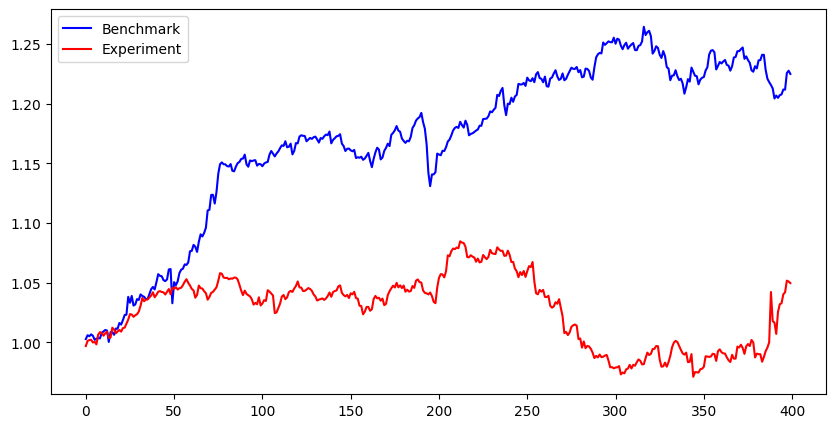

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.cumprod(bench_ret+1), color="blue", label="Benchmark")
ax.plot(np.cumprod(exper_ret+1), color="red", label="Experiment")
ax.legend()
plt.plot()

In [5269]:
mpt = pd.read_csv("Data/MPT_weights.csv")
mpt.shape

(400, 24)

In [33]:
from src.Result.Menchero_OGA import MencheroOGA as MOGA

In [34]:
miff = MOGA(exper_w,6,4)

In [38]:
miff.allocation_effects

In [28]:
last_ret  =  mytest.iloc[-400:].reset_index(drop=True)
last_ret.shape

(400, 24)

In [29]:
bravo = np.array([np.dot(mpt.iloc[i], last_ret.iloc[i]) for i in range(400)])

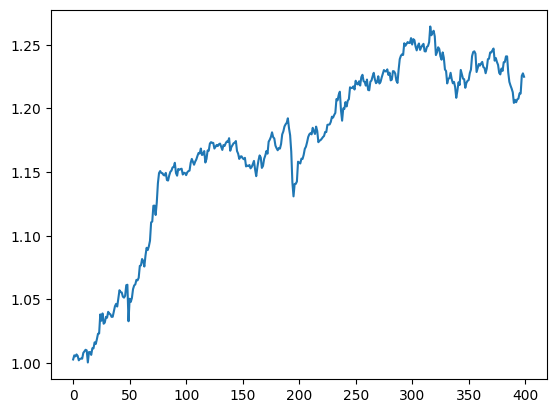

In [30]:
plt.plot(np.cumprod(1+bravo))

In [31]:
# 

In [32]:
# 